In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [11]:
net_fold = "../datasets/STRING/phate"
networks = os.listdir(net_fold)
dfs      = {}
for i, net in enumerate([f"{net_fold}/{network}/outputs/" for network in networks]):
    for GO in ["P", "F", "C"]:
        if os.path.exists(f"{net}/res-results_dim_100_t_5-{GO}.tsv"):
            dfs[f"{networks[i]}#{GO}"] = pd.read_csv(f"{net}/res-results_dim_100_t_5-{GO}.tsv", sep = "\t")

In [17]:
dfs

{'neighbor#P':    Unnamed: 0   RESNICK        F1       ACC
 0           0  2.382530  0.632220  0.455556
 1           1  2.532254  0.636114  0.533333
 2           2  2.309865  0.594749  0.566667
 3           3  2.217795  0.576299  0.577778
 4           4  2.449200  0.520914  0.576087,
 'neighbor#C':    Unnamed: 0   RESNICK        F1       ACC
 0           0  1.079144  0.307114  0.145497
 1           1  1.020193  0.304764  0.152425
 2           2  1.052175  0.332792  0.180139
 3           3  1.098793  0.299300  0.168591
 4           4  1.002846  0.356862  0.218894,
 'fusion#P':    Unnamed: 0   RESNICK        F1       ACC
 0           0  0.911921  0.200041  0.146739
 1           1  1.071218  0.238674  0.141304
 2           2  1.007408  0.277628  0.130435
 3           3  1.014570  0.251182  0.135870
 4           4  1.010328  0.239293  0.145946,
 'fusion#F':    Unnamed: 0   RESNICK        F1       ACC
 0           0  1.094118  0.243127  0.087379
 1           1  1.142462  0.226916  0.087379


In [30]:
data = []

for netgo in dfs:
    net, go = netgo.split("#")
    for fold in range(5):
        for metric in ["RESNICK", "F1", "ACC"]:
            # print(dfs[netgo].loc[fold, [metric]].values[0])
            data.append((net, go, metric, fold, dfs[netgo].loc[fold, [metric]].values[0]))

In [31]:
df = pd.DataFrame(data, columns = ["Network", "GO", "metrics", "fold", "score"])
df

,Network,GO,metrics,fold,score
0,neighbor,P,RESNICK,0,2.382530
1,neighbor,P,F1,0,0.632220
2,neighbor,P,ACC,0,0.455556
3,neighbor,P,RESNICK,1,2.532254
4,neighbor,P,F1,1,0.636114
...,...,...,...,...,...
160,coocurrence,C,F1,3,0.312643
161,coocurrence,C,ACC,3,0.104575
162,coocurrence,C,RESNICK,4,1.088693
163,coocurrence,C,F1,4,0.310733


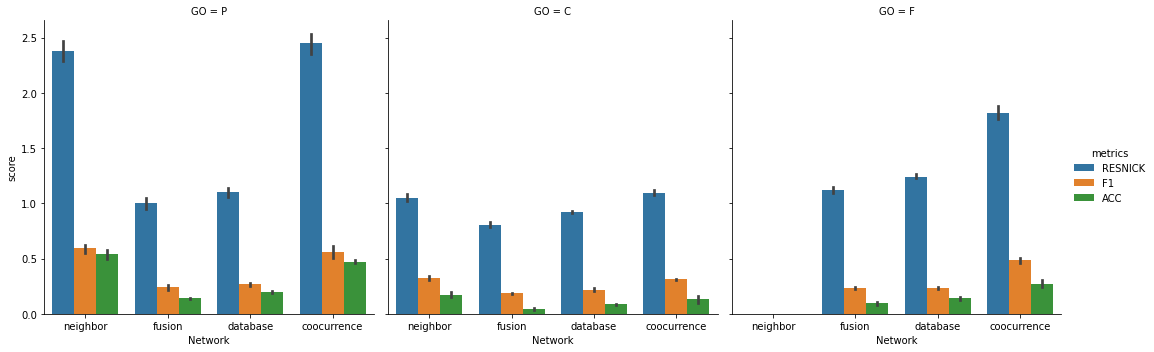

In [35]:
sns.catplot(data = df, x="Network", y="score", hue="metrics", col="GO", kind="bar")